## Importación de librerías

In [1]:
import numpy as np
from matplotlib import image
from  matplotlib import pyplot as plt

img1 = image.imread('imagen.jpg')
img2 = image.imread('imagen2.jpg')
img3 = image.imread('imagen3.jpg')


## Definición de funciones

In [2]:
# Deformación directamente proporcional a la altura de la imagen y a la distancia a su eje vertical central
def xaxis_lineal(x, y, alpha, initial_img_shape):
    x_central = int(initial_img_shape[1]*0.5)
    if (x <= x_central):
        return round(x+(y*alpha)*((x_central-x)/x_central))
    if (x > x_central):
        return round(x-(y*alpha)*((x-x_central))/x_central)

# Mantiene el ancho de la imagen original. Al generarse pixeles sin información se rellenarán con información propia de los vecinos
def xaxis_fullwidth(x, y, alpha, initial_img_shape):
    y_initial, x_initial, z_initial = initial_img_shape
    x_first = xaxis_lineal(0, y_initial, alpha, initial_img_shape)
    x_central = int(initial_img_shape[1]*0.5)
    if (x <= x_central):
        return round(-x_first*((x_central-x)/x_central)+x+(y*alpha)*((x_central-x)/x_central))
    if (x > x_central):
        return round(x_first*((x-x_central)/x_central)+x-(y*alpha)*((x-x_central))/x_central)

# La modificación lineal de las posiciones se hace expansiva sobre la linea horizontal central de la imagen y contractiva en bajo la misma
def xaxis_horizontal(x, y, alpha, x_central, y_central):
    if (y >= y_central):
        if (x <= x_central):
            return round(x+((y-y_central)*alpha)*((x_central-x)/x_central))
        if (x > x_central):
            return round(x-((y-y_central)*alpha)*((x-x_central))/x_central)
    else:
        if (x <= x_central):
            return round(x+((y-y_central)*alpha*(1+alpha))*((x_central-x)/x_central))
        if (x > x_central):
            return round(x-((y-y_central)*alpha*(1+alpha))*((x-x_central))/x_central)


def cropNewImage(img, alpha):
    y_initial, x_initial, z_initial = img.shape
    x_first = xaxis_lineal(0, y_initial, alpha, img.shape)
    x_last = x_initial-x_first
    return img[:, x_first:x_last, :]


In [3]:
def keystone_effect(img, alpha, mode):
    zero_matrix_shape = np.zeros(img.shape)
    initial_img_shape = img.shape
#  LINEAL
    if (mode == "croppedLineal" or mode == "lineal"):
        for position, pixel in np.ndenumerate(img[:, :, :]):
            if (xaxis_lineal(position[1], position[0], alpha, initial_img_shape) in range(0, initial_img_shape[1])):
                zero_matrix_shape[position[0], xaxis_lineal(
                    position[1], position[0], alpha, initial_img_shape), position[2]] = pixel
        if (mode == "lineal"):
            return zero_matrix_shape.astype(int)
        else:
            return cropNewImage(zero_matrix_shape.astype(int), alpha)
#  FULLWIDTH
    if (mode == "croppedFullwidth" or mode == "fullwidth"):
        if (mode == "fullwidth"):
            for position, pixel in np.ndenumerate(img[:, :, :]):
                if (xaxis_fullwidth(position[1], position[0], alpha, initial_img_shape) in range(0, initial_img_shape[1])):
                    zero_matrix_shape[position[0], xaxis_fullwidth(
                        position[1], position[0], alpha, initial_img_shape), position[2]] = pixel
            return zero_matrix_shape.astype(int)
        else:
            for position, pixel in np.ndenumerate(img[:, :, :]):
                x_newpos = xaxis_fullwidth(
                    position[1], position[0], alpha, initial_img_shape)

                if not (x_newpos < 0 or x_newpos >= img.shape[1]):

                    zero_matrix_shape[position[0],
                                 x_newpos, position[2]] = pixel
                    nextPixel = x_newpos - posicion_anterior
                    if (nextPixel > 1):
                        zero_matrix_shape[position[0], x_newpos -
                                     1, 0] = valor_anterior_RGB0
                        zero_matrix_shape[position[0], x_newpos -
                                     1, 1] = valor_anterior_RGB1
                        zero_matrix_shape[position[0], x_newpos -
                                     1, 2] = valor_anterior_RGB2

                posicion_anterior = x_newpos
                if (position[2] == 0):
                    valor_anterior_RGB0 = pixel
                if (position[2] == 1):
                    valor_anterior_RGB1 = pixel
                if (position[2] == 2):
                    valor_anterior_RGB2 = pixel
            return zero_matrix_shape.astype(int)
#  HORIZONTAL
    if (mode == "croppedHorizontal" or mode == "horizontal"):
        x_central = int(img.shape[1]*0.5)
        y_central = int(img.shape[0]*0.5)
        x_max = int(img.shape[1])

        for position, pixel in np.ndenumerate(img[:, :, :]):
            x_newpos = xaxis_horizontal(
                position[1], position[0], alpha, x_central, y_central)

            if not (x_newpos < 0 or x_newpos >= x_max):

                zero_matrix_shape[position[0],
                             x_newpos, position[2]] = pixel
                nextPixel = x_newpos - posicion_anterior
                if (nextPixel > 1):
                    zero_matrix_shape[position[0], x_newpos -
                                 1, 0] = valor_anterior_RGB0
                    zero_matrix_shape[position[0], x_newpos -
                                 1, 1] = valor_anterior_RGB1
                    zero_matrix_shape[position[0], x_newpos -
                                 1, 2] = valor_anterior_RGB2

            posicion_anterior = x_newpos
            if (position[2] == 0):
                valor_anterior_RGB0 = pixel
            if (position[2] == 1):
                valor_anterior_RGB1 = pixel
            if (position[2] == 2):
                valor_anterior_RGB2 = pixel
        if (mode == "horizontal"):
            return zero_matrix_shape.astype(int)
        else:
            return cropNewImage(zero_matrix_shape.astype(int), alpha*0.5)


## Ejemplos: Lineal, Fullwidth, Horizontal

Text(0.5, 1.0, 'LINEAL')

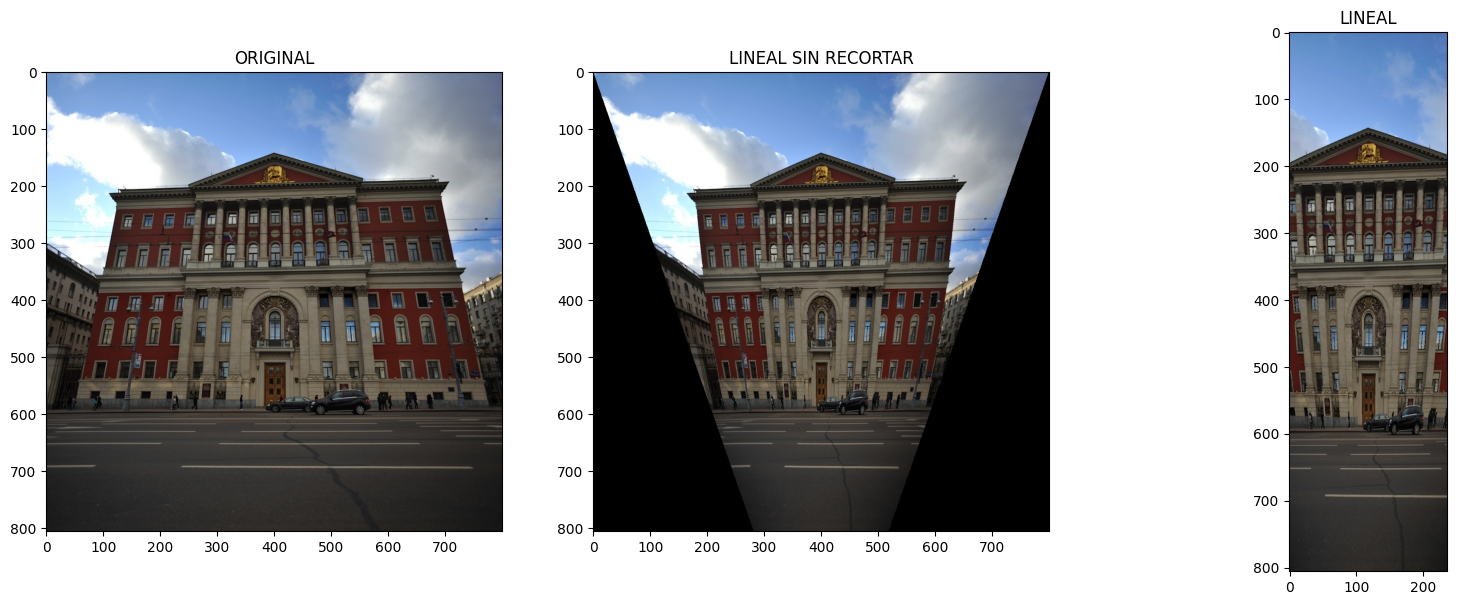

In [4]:
fig2, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 7))
ax0.imshow(img1)
ax0.set_title("ORIGINAL")
ax1.imshow(keystone_effect(img1, 0.35, "lineal"))
ax1.set_title("LINEAL SIN RECORTAR")
ax2.imshow(keystone_effect(img1, 0.35, "croppedLineal"))
ax2.set_title("LINEAL")


Text(0.5, 1.0, 'FULLWIDTH')

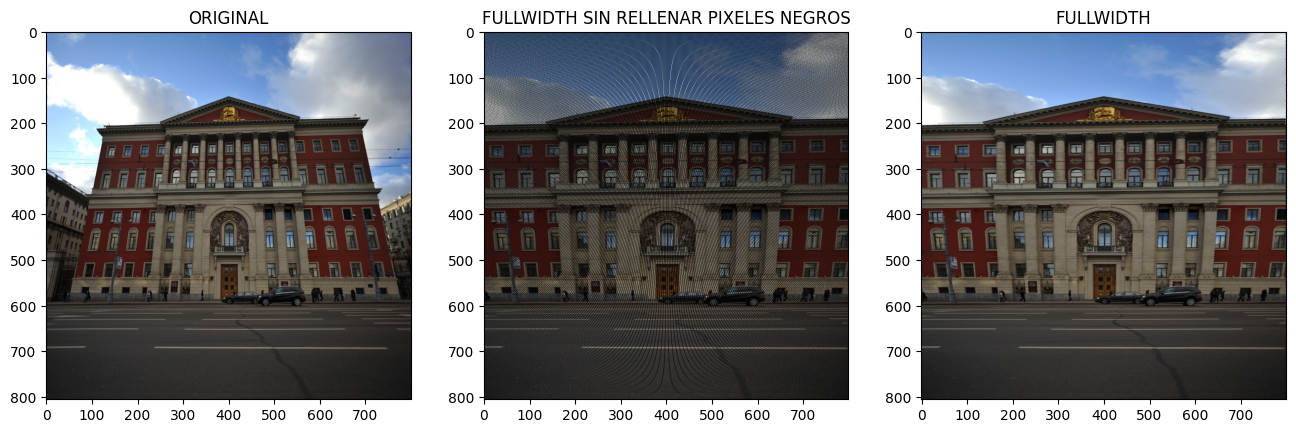

In [5]:
fig3, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(16, 6))
ax0.imshow(img1)
ax0.set_title("ORIGINAL")
ax1.imshow(keystone_effect(img1, 0.50, "fullwidth"))
ax1.set_title("FULLWIDTH SIN RELLENAR PIXELES NEGROS")
ax2.imshow(keystone_effect(img1, 0.50, "croppedFullwidth"))
ax2.set_title("FULLWIDTH")


Text(0.5, 1.0, 'HORIZONTAL')

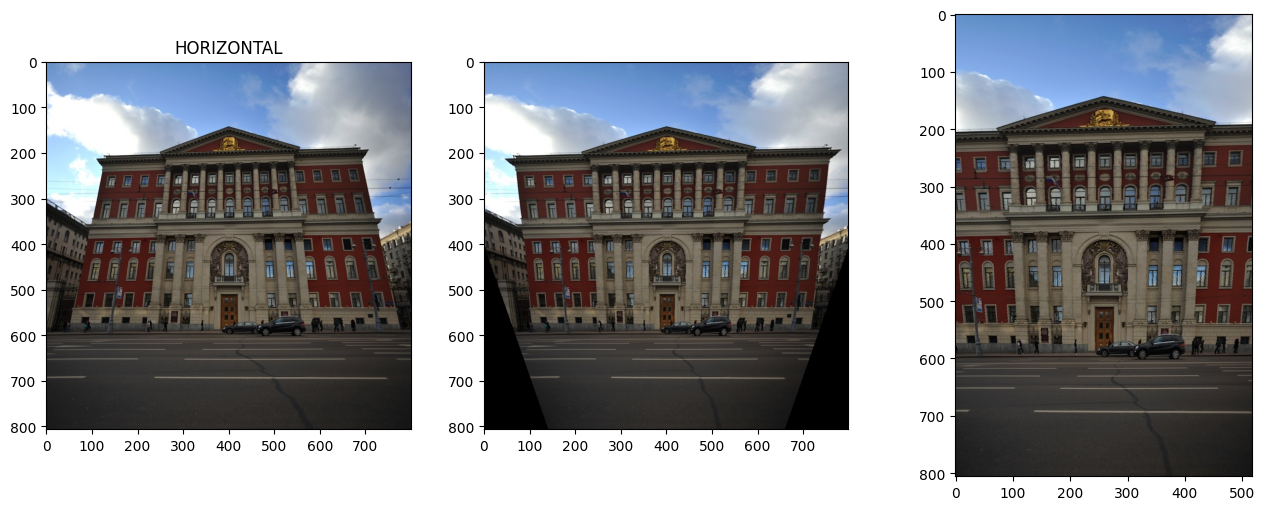

In [6]:
fig4, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(16, 6))
ax0.imshow(img1)
ax0.set_title("ORIGINAL")
ax1.imshow(keystone_effect(img1, 0.35, "horizontal"))
ax0.set_title("HORIZONTAL SIN RECORTAR")
ax2.imshow(keystone_effect(img1, 0.35, "croppedHorizontal"))
ax0.set_title("HORIZONTAL")
